# DeepWalk. Node2vec.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Случайные блуждания на графах"
* Документация:
    * https://radimrehurek.com/gensim/models/word2vec.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
    * http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    
* Дополнительные источники:
    * https://memgraph.com/blog/how-node2vec-works
    * https://github.com/eliorc/node2vec

## Вопросы для совместного обсуждения

1\. Обсудите принцип работы алгоритмов DeepWalk и Node2vec и рассмотрите примеры обучения модели word2vec при помощи пакета `gensim`.

In [1]:
import numpy as np
import networkx as nx

def generate_fake_walk(
    G: nx.Graph,
    start_node: int,
    walk_len: int
) -> list[int]:
  walk = np.random.randint(0, 10, walk_len)
  return list(walk)

In [2]:
walk = generate_fake_walk(None, None, 5)
walk

[2, 5, 4, 7, 9]

In [3]:
n_walks = 10
walk_len = 5

walks = [
    generate_fake_walk(None, None, walk_len)
    for _ in range(n_walks)
]

In [4]:
walks

[[1, 4, 7, 5, 3],
 [2, 7, 5, 0, 2],
 [4, 1, 2, 3, 4],
 [9, 0, 5, 9, 7],
 [9, 9, 7, 2, 7],
 [5, 5, 4, 4, 4],
 [5, 1, 8, 0, 7],
 [8, 6, 6, 2, 2],
 [9, 1, 5, 9, 8],
 [3, 6, 9, 9, 6]]

In [5]:
import gensim
from gensim.models import Word2Vec

import logging

In [6]:
logging.basicConfig(level=logging.INFO, force=True)

In [7]:
model = Word2Vec(
    sentences=walks,
    vector_size=160,
    window=3,
    min_count=1,
    epochs=5
)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 10 word types from a corpus of 50 raw words and 10 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 10 unique words (100.00% of original 10, drops 0)', 'datetime': '2024-04-17T07:13:29.578862', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 50 word corpus (100.00% of original 50, drops 0)', 'datetime': '2024-04-17T07:13:29.580952', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
INFO:gensim.mod

In [8]:
vectors = model.wv.vectors
vectors.shape

(10, 160)

In [9]:
vectors[0].shape

(160,)

In [10]:
model.wv.index_to_key

[9, 5, 2, 7, 4, 6, 1, 8, 0, 3]

In [11]:
model.wv.key_to_index

{9: 0, 5: 1, 2: 2, 7: 3, 4: 4, 6: 5, 1: 6, 8: 7, 0: 8, 3: 9}

In [12]:
def generate_fake_walk_str(
    G: nx.Graph | None,
    start_node: str | None,
    walk_len: int
) -> list[str]:
  walk = np.random.randint(0, 10, walk_len)
  return list(walk.astype(str))

In [13]:
n_walks = 10
walk_len = 5

walks = [
    generate_fake_walk_str(None, None, walk_len)
    for _ in range(n_walks)
]

In [14]:
walks

[['9', '3', '9', '4', '4'],
 ['9', '1', '9', '7', '5'],
 ['8', '4', '9', '6', '5'],
 ['7', '1', '3', '2', '9'],
 ['3', '2', '9', '0', '4'],
 ['0', '8', '3', '1', '8'],
 ['1', '5', '0', '5', '8'],
 ['9', '6', '9', '6', '7'],
 ['9', '7', '1', '1', '5'],
 ['8', '2', '9', '2', '9']]

In [15]:
model = Word2Vec(
    sentences=walks,
    vector_size=160,
    window=3,
    min_count=1,
    epochs=5
)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 10 word types from a corpus of 50 raw words and 10 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 10 unique words (100.00% of original 10, drops 0)', 'datetime': '2024-04-17T07:13:29.822229', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 50 word corpus (100.00% of original 50, drops 0)', 'datetime': '2024-04-17T07:13:29.823517', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
INFO:gensim.mod

In [16]:
model.wv.index_to_key

['9', '1', '8', '5', '2', '7', '4', '3', '0', '6']

In [17]:
model.wv.key_to_index

{'9': 0,
 '1': 1,
 '8': 2,
 '5': 3,
 '2': 4,
 '7': 5,
 '4': 6,
 '3': 7,
 '0': 8,
 '6': 9}

In [18]:
model.wv[1][:5]

array([-0.00533875,  0.00200661, -0.00289278, -0.00316872,  0.00223392],
      dtype=float32)

In [19]:
model.wv['8'][:5]

array([ 0.00104116, -0.00137238,  0.00594923,  0.00594105, -0.0061145 ],
      dtype=float32)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Напишите функцию `generate_walk`, которая принимает на вход граф `G`, начальный узел `node` и генерирует случайное блуждание длины `walk_len`, начинающееся с этого узла. Сгенерируйте реализации 1000 случайных блужданий длины 3 с началом в случайно выбранных узлах для карате клуба.

Используя полученные последовательности узлов, обучите модель Word2Vec из пакета `gensim` со следующими гиперпараметрами: размерность эмбеддингов 32, ширина контекстного окна 3.

Получите эмбеддинги узлов и уменьшите их размерность до 2 при помощи алгоритмов PCA или t-SNE. Визуализируйте граф, используя эмбеддинги размерности 2 в качестве координат узлов. Раскрасьте узлы в цвет соответствующего им клуба.

- [X] Проверено на семинаре

In [20]:
import numpy as np
import networkx as nx
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [107]:
def generate_walk(
    G: nx.Graph | None,
    start_node: str | None,
    walk_len: int
) -> list[str]:

    walk = [start_node]
    node = start_node
    for _ in range(walk_len - 1):
        neighbors = list(G.neighbors(node))
        next_node = np.random.choice(neighbors)
        walk.append(next_node)
        node = next_node
    return walk

In [108]:
G = nx.karate_club_graph()

In [109]:
walks = []
for _ in range(1000):
    start_node = np.random.choice(list(G.nodes()))
    walk = generate_walk(G, start_node, 3)
    walks.append(walk)

In [110]:
model = Word2Vec(
    sentences=walks,
    vector_size=32,
    window=3,
    min_count=1,
    epochs=5
)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 34 word types from a corpus of 3000 raw words and 1000 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 34 unique words (100.00% of original 34, drops 0)', 'datetime': '2024-04-17T07:17:45.042142', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 3000 word corpus (100.00% of original 3000, drops 0)', 'datetime': '2024-04-17T07:17:45.043416', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
INFO:ge

In [111]:
node_emb = {node: model.wv[k] for k,node in enumerate(model.wv.index_to_key)}


In [112]:
model.wv.index_to_key

[33,
 0,
 32,
 2,
 1,
 31,
 29,
 23,
 13,
 3,
 6,
 5,
 27,
 7,
 8,
 10,
 25,
 26,
 30,
 4,
 16,
 28,
 19,
 24,
 9,
 22,
 17,
 12,
 15,
 18,
 14,
 20,
 11,
 21]

In [113]:
node_emb

{33: array([ 0.02390238, -0.02829622,  0.00432288,  0.00015141,  0.02225159,
        -0.02013559,  0.00672032, -0.0135248 , -0.03023552,  0.01450462,
        -0.02443729, -0.01824107,  0.00014368, -0.00492741, -0.02849322,
         0.02622269,  0.01314967,  0.02880882, -0.02533492,  0.01754476,
        -0.0092239 ,  0.0094016 ,  0.03848002, -0.01681085,  0.01685176,
        -0.01802236, -0.01565828,  0.03186456, -0.00867147, -0.00606358,
        -0.01543145, -0.02353191], dtype=float32),
 0: array([-0.00941948,  0.01846414,  0.03794146, -0.00980782, -0.00382906,
        -0.01874421,  0.01624355,  0.00976301,  0.02153643,  0.01820751,
         0.03190035,  0.02687361,  0.02506861, -0.02448642, -0.03145865,
        -0.00373131, -0.0113952 ,  0.02498146,  0.01935726, -0.00267855,
         0.0069677 ,  0.00936119,  0.03176833, -0.03154195,  0.00126722,
         0.01257287, -0.00529587,  0.02722124,  0.02666255,  0.0165996 ,
        -0.0032128 ,  0.02485922], dtype=float32),
 32: array([-0.

In [114]:
node_emb_s = {k: node_emb[k] for k in sorted(node_emb.keys())}

In [115]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(list(node_emb_s.values()))

In [116]:
emb_2d

array([[ 0.05319043, -0.00015882],
       [-0.03743894,  0.01483523],
       [ 0.01523577, -0.02874268],
       [-0.01338356,  0.01337486],
       [ 0.01591169, -0.00453463],
       [ 0.00571036,  0.03566017],
       [-0.00652867, -0.03342547],
       [-0.01909662, -0.03714177],
       [ 0.06385922, -0.01632085],
       [ 0.03312993, -0.01395815],
       [ 0.03545329, -0.03629443],
       [ 0.02153125,  0.01328823],
       [-0.02119487, -0.01774194],
       [-0.0186013 ,  0.0003357 ],
       [ 0.02217483,  0.00438719],
       [ 0.0461125 ,  0.01484633],
       [ 0.00335977,  0.0338314 ],
       [ 0.04950011,  0.01700773],
       [-0.0608223 , -0.00458521],
       [-0.03797096,  0.03880742],
       [ 0.00168236,  0.05697546],
       [-0.02694157, -0.05458245],
       [ 0.03450752, -0.04256543],
       [ 0.03997448, -0.01690673],
       [-0.05138516, -0.02132263],
       [-0.03702363,  0.02364931],
       [-0.02580854,  0.03989938],
       [ 0.02327627,  0.04714785],
       [-0.0226679 ,

In [117]:
pos = {node:coord for node,coord in enumerate(emb_2d)}

In [118]:
pos

{0: array([ 0.05319043, -0.00015882]),
 1: array([-0.03743894,  0.01483523]),
 2: array([ 0.01523577, -0.02874268]),
 3: array([-0.01338356,  0.01337486]),
 4: array([ 0.01591169, -0.00453463]),
 5: array([0.00571036, 0.03566017]),
 6: array([-0.00652867, -0.03342547]),
 7: array([-0.01909662, -0.03714177]),
 8: array([ 0.06385922, -0.01632085]),
 9: array([ 0.03312993, -0.01395815]),
 10: array([ 0.03545329, -0.03629443]),
 11: array([0.02153125, 0.01328823]),
 12: array([-0.02119487, -0.01774194]),
 13: array([-0.0186013,  0.0003357]),
 14: array([0.02217483, 0.00438719]),
 15: array([0.0461125 , 0.01484633]),
 16: array([0.00335977, 0.0338314 ]),
 17: array([0.04950011, 0.01700773]),
 18: array([-0.0608223 , -0.00458521]),
 19: array([-0.03797096,  0.03880742]),
 20: array([0.00168236, 0.05697546]),
 21: array([-0.02694157, -0.05458245]),
 22: array([ 0.03450752, -0.04256543]),
 23: array([ 0.03997448, -0.01690673]),
 24: array([-0.05138516, -0.02132263]),
 25: array([-0.03702363,  

In [119]:
colors = ['r' if data['club'] == 'Mr. Hi' else 'b' for _, data in G.nodes(data=True)]

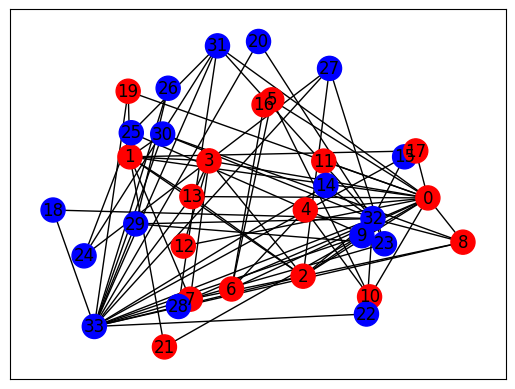

In [120]:
nx.draw_networkx(G, pos = pos, node_color = colors )

<p class="task" id="2"></p>

2\. Используя нейронную сеть (можно воспользоваться реализацией из `sklearn` или `torch`) с одним скрытым слоем на 16 нейронов, решите задачу классификации узлов графа. В качестве признаков используйте эмбеддинги узлов, полученные в предыдущей задаче (до уменьшения размерности), в качестве меток - названия клубов узлов. Выведите на экран accuracy полученной модели.

- [X] Проверено на семинаре

In [121]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

In [122]:
X = np.array([node_emb[node] for node in G.nodes()])
y = np.array([0 if data['club'] == 'Mr. Hi' else 1 for _, data in G.nodes(data=True)])

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
class Net(nn.Module):
    def __init__(self, input, n, output):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input, n)
        self.fc2 = nn.Linear(n, output)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [125]:
net = Net(X_train.shape[1], 16, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [126]:
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

In [127]:
for epoch in range(300):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

In [128]:
with torch.no_grad():
    outputs = net(torch.Tensor(X_test))
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.numpy()
    accuracy = accuracy_score(y_test, predicted)
    print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.71


<p class="task" id="3"></p>

3\. Напишите функцию `generate_biased_walk`, которая принимает на вход граф `G`, начальный узел `node` и генерирует смещенное случайное блуждание длины `walk_len`, начинающееся с этого узла.

![](https://i.imgur.com/CtnVJFJ.png)

Сгенерируйте реализации 1000 случайных блужданий длины 3 с началом в случайно выбранных узлах.

- [X] Проверено на семинаре

In [43]:
def generate_biased_walk(G, node, walk_len, p, q):
    pass

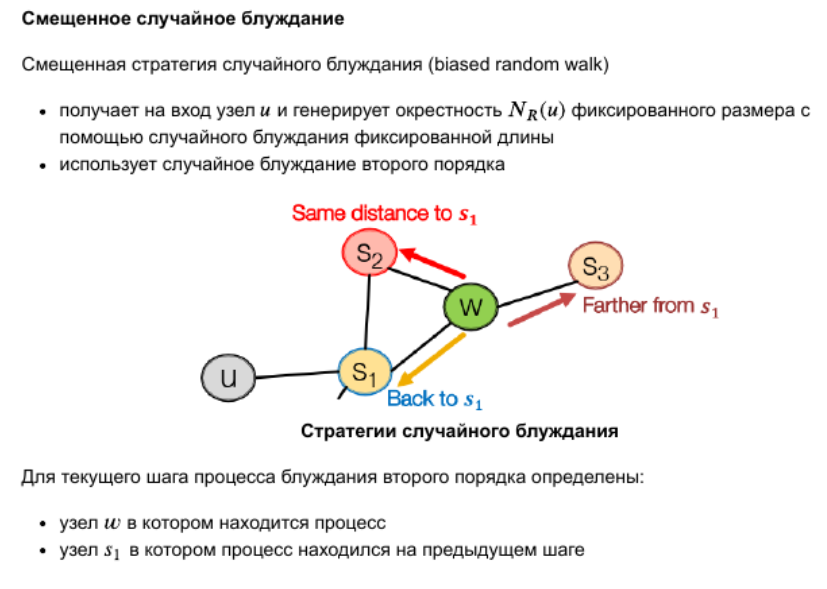

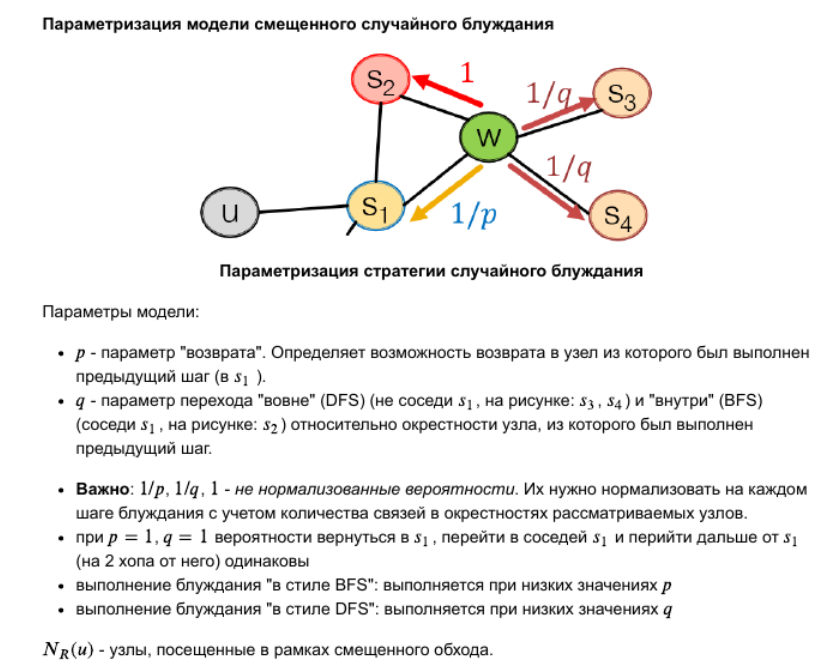

In [44]:
def generate_biased_walk(G, node, walk_len, p, q):
    walk = [node]
    prev_node = None
    curr_node = node
    for i in range(walk_len - 1):
        neighbors = list(G.neighbors(curr_node))
        weights = []
        for neighbor in neighbors:
            if neighbor == prev_node:
                weights.append(1 / p)
            elif G.has_edge(prev_node, neighbor):
                weights.append(1)
            else:
                weights.append(1 / q)
        next_node = np.random.choice(neighbors, p=weights/np.sum(weights))
        walk.append(next_node)
        prev_node = curr_node
        curr_node = next_node
    return walk

In [45]:
walks = []
for _ in range(1000):
    start_node = np.random.choice(list(G.nodes))
    walk = generate_biased_walk(G, start_node, 3, 0.5, 0.5)
    walks.append(walk)

In [46]:
walks[:5]

[[4, 10, 4], [14, 32, 18], [9, 2, 27], [31, 32, 22], [0, 2, 7]]

<p class="task" id="4"></p>

4\. Сгенерируйте реализации 1000 смещенных случайных блужданий длины 5 с началом в случайно выбранных узлах с параметрами `p=1` и `q=2`.

Используя полученные последовательности узлов, обучите модель Word2Vec из пакета `gensim` со следующими гиперпараметрами: размерность эмбеддингов 32, ширина контекстного окна 3.

Получите эмбеддинги узлов и уменьшите их размерность до 2 при помощи алгоритмов PCA или t-SNE. Визуализируйте граф, используя эмбеддинги размерности 2 в качестве координат узлов. Раскрасьте узлы в цвет соответствующего им клуба.

- [X] Проверено на семинаре

In [47]:
walks = []
for _ in range(1000):
    start_node = np.random.choice(list(G.nodes))
    walk = generate_biased_walk(G, start_node, 5, 1, 2)
    walks.append(walk)

In [ ]:
model = Word2Vec(
    sentences=walks,
    vector_size=32,
    window=3
)

In [49]:
node_emb = {node: model.wv[k] for k,node in enumerate(model.wv.index_to_key)}


In [50]:
node_emb_s = {k: node_emb[k] for k in sorted(node_emb.keys())}

In [51]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(list(node_emb_s.values()))

In [52]:
pos = {node:coord for node,coord in enumerate(emb_2d)}

In [53]:
colors = ['r' if data['club'] == 'Mr. Hi' else 'b' for _, data in G.nodes(data=True)]

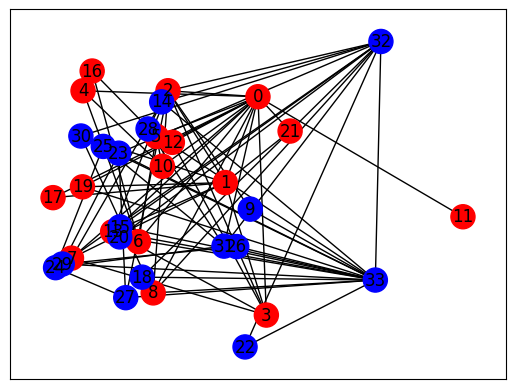

In [54]:
nx.draw_networkx(G, pos = pos, node_color = colors )

<p class="task" id="5"></p>

5\. Используя  [готовую реализацию node2vec](https://github.com/eliorc/node2vec), обучите модель с гиперпараметрами, аналогичными предыдущей задачи. Получите эмбеддинги узлов и уменьшите их размерность до 2 при помощи алгоритмов PCA или t-SNE. Визуализируйте граф, используя эмбеддинги размерности 2 в качестве координат узлов. Раскрасьте узлы в цвет соответствующего им клуба.

- [ ] Проверено на семинаре

In [ ]:
!pip install node2vec

In [56]:
import node2vec
from node2vec import Node2Vec

In [129]:
node2vec = Node2Vec(G, dimensions=32, walk_length=5, num_walks=100, p=1, q=2, workers=4)

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
model = node2vec.fit(window=3, min_count=1, batch_words=4)

In [131]:
node_emb = {node: model.wv[k] for k,node in enumerate(model.wv.index_to_key)}


In [132]:
node_emb_s = {k: node_emb[k] for k in sorted(node_emb.keys())}

In [133]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(list(node_emb_s.values()))

In [134]:
pos = {node:coord for node,coord in enumerate(emb_2d)}

In [135]:
colors = ['r' if data['club'] == 'Mr. Hi' else 'b' for _, data in G.nodes(data=True)]

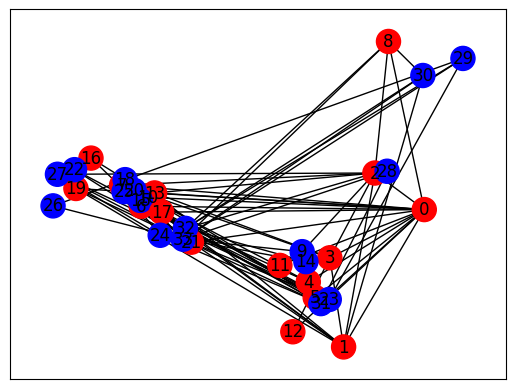

In [136]:
nx.draw_networkx(G, pos = pos, node_color = colors )